In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores, get_norm_score,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer,
                                         plot_combined_scores)

In [3]:
num_bo_iters = 25
num_layers = 5

In [5]:
experiment_dir = "../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25"
meta_log, hyper_log = load_result_logs(experiment_dir)

In [6]:
hyper_log.best_bo_score.mean()

0.2684175231390529

# Bayesian Optimization Procedure Across Network Feature Layers

../utils/visualize_experiments.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eval_id = hyper_log.hyper_log[hyper_log.hyper_log.subject_id == subject_id][hyper_log.hyper_log.roi_type == roi_type].run_id.iloc[0]


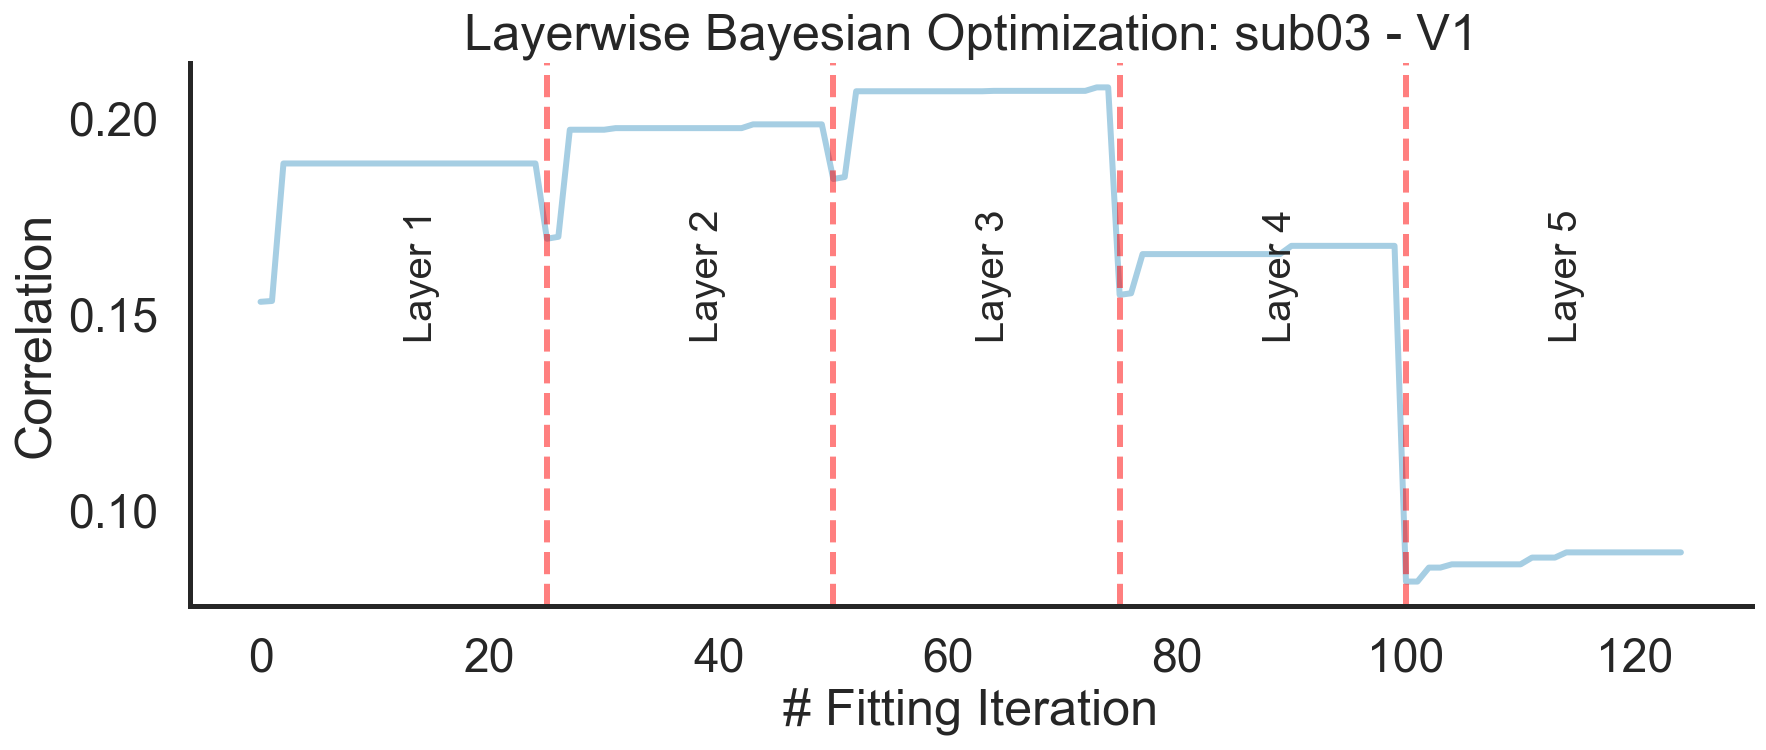

In [16]:
plot_bo_scores(meta_log, hyper_log, subject_id="sub03", roi_type="V1", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

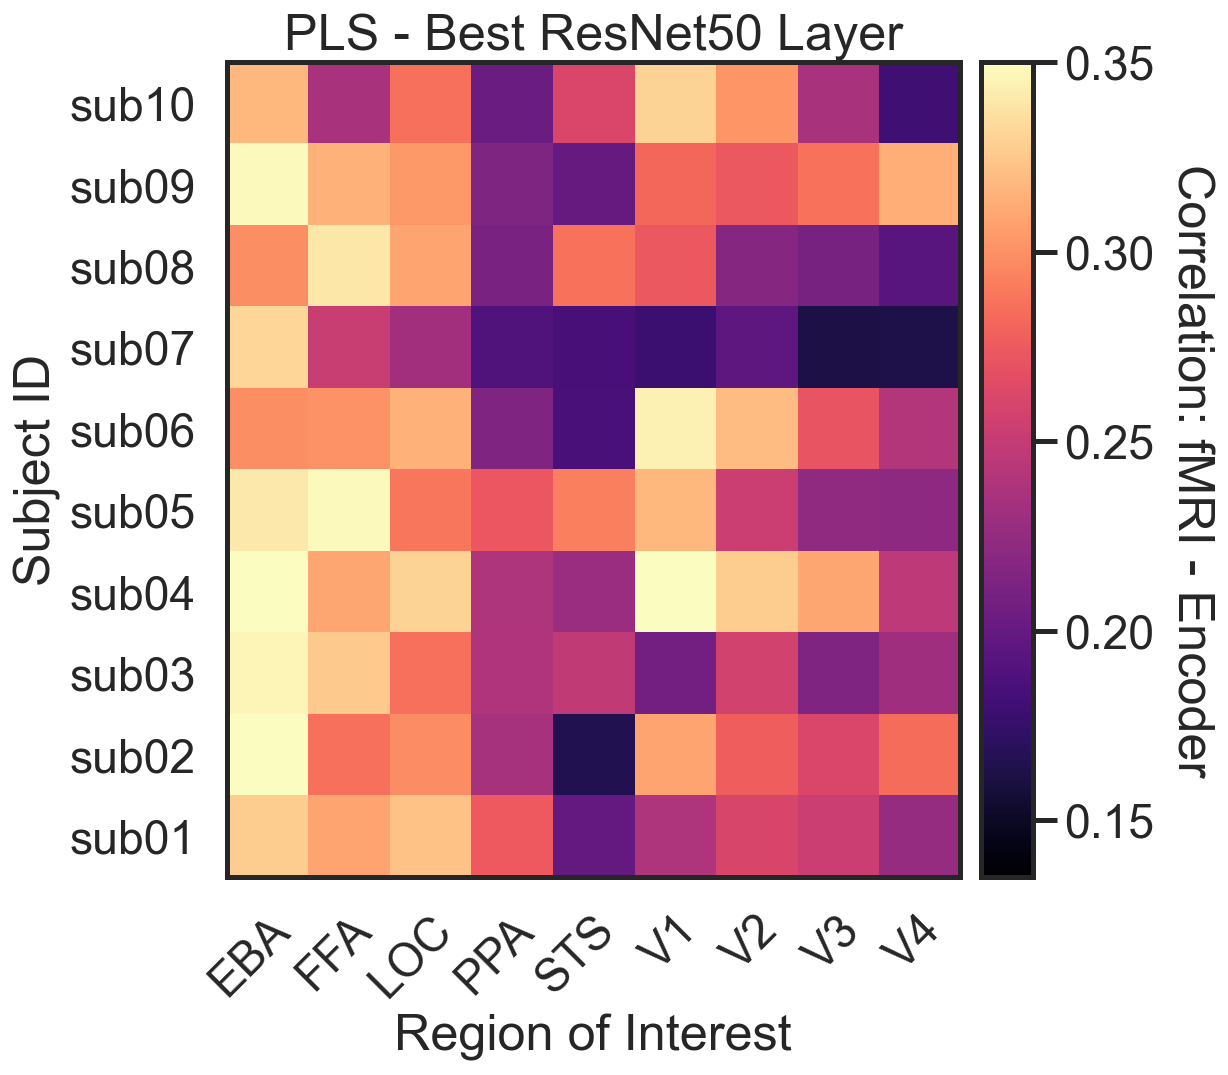

In [17]:
plot_roi_subject_grid(hyper_log, title="PLS - Best ResNet50 Layer")

[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]


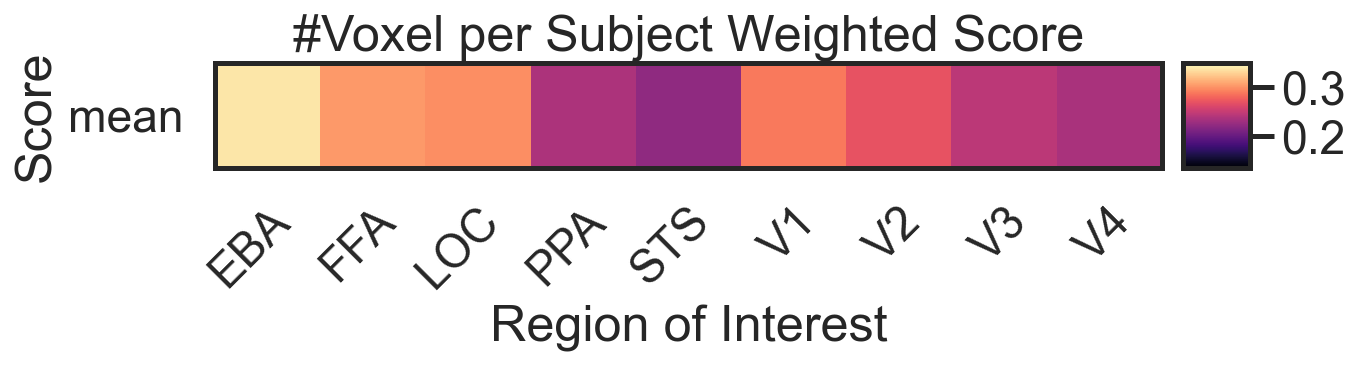

In [18]:
get_norm_score(hyper_log, plot=True)

# Performance Per Layer

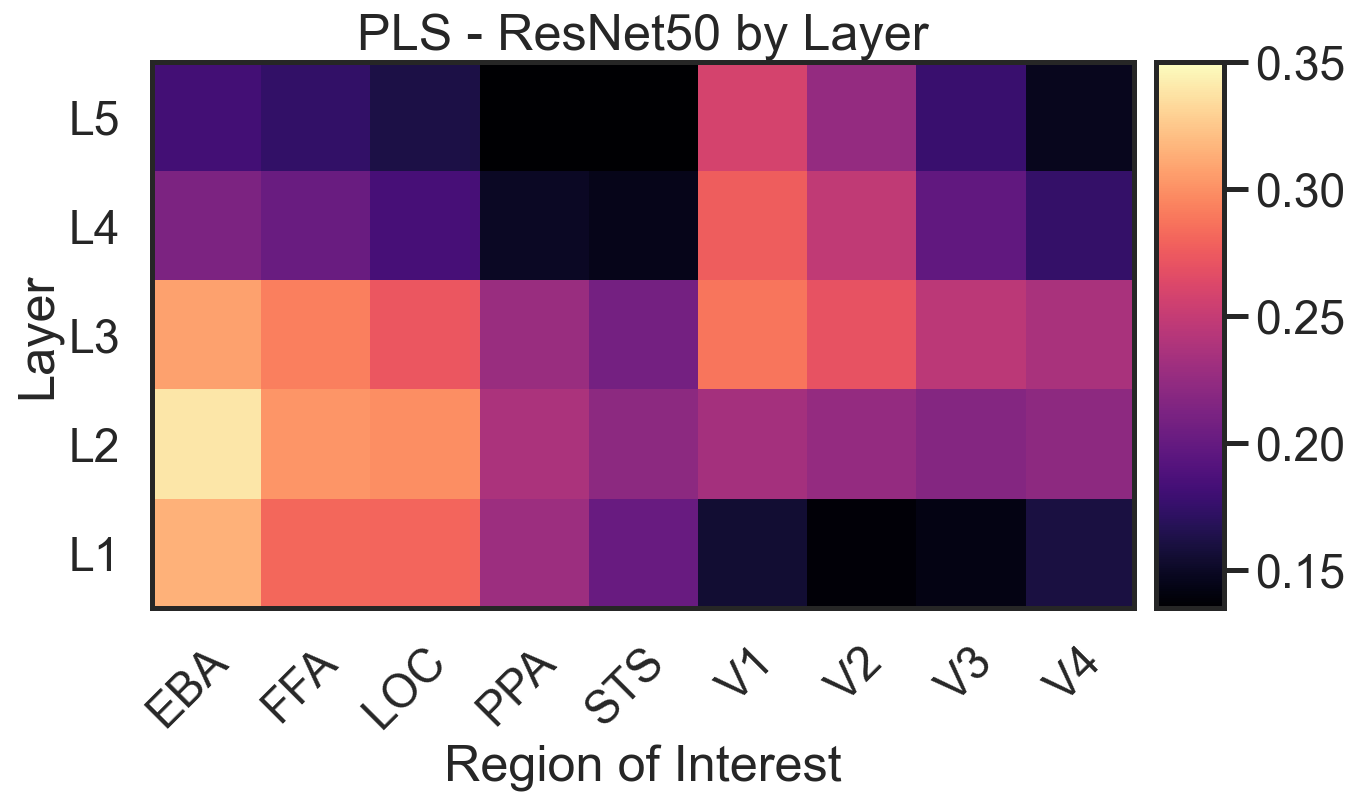

In [19]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=25, num_layers=5, title="PLS - ResNet50 by Layer")

# Feature Compression Comparison

In [23]:
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_pca_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_pca_250_resnet50_bo_25")

pca_50 = get_norm_score(hyper_log_50)
pca_100 = get_norm_score(hyper_log_100)
pca_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_umap_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_umap_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_umap_250_resnet50_bo_25")

umap_50 = get_norm_score(hyper_log_50)
umap_100 = get_norm_score(hyper_log_100)
umap_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_mds_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_mds_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_mds_250_resnet50_bo_25")

mds_50 = get_norm_score(hyper_log_50)
mds_100 = get_norm_score(hyper_log_100)
mds_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_250_resnet50_bo_25")

autoencoder_50 = get_norm_score(hyper_log_50)
autoencoder_100 = get_norm_score(hyper_log_100)
autoencoder_250 = get_norm_score(hyper_log_250)

[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]
[0.32510277 0.29380174 0.28471584 0.22370557 0.20413307 0.27984372
 0.25911292 0.23227961 0.21918852]
[0.28410743 0.25138173 0.24569472 0.18414349 0.16837989 0.2539016
 0.23417934 0.20749482 0.19357519]
[0.29606857 0.27159911 0.25696171 0.20536804 0.20388058 0.20534238
 0.19034038 0.17579684 0.18361677]
[0.29377299 0.26862007 0.25450451 0.21224569 0.20068574 0.20792524
 0.1930476  0.17420439 0.18397074]
[0.29603814 0.27017312 0.25833713 0.21646702 0.20051071 0.2094153
 0.19218518 0.17682983 0.18621988]
[0.32882601 0.29881855 0.28888397 0.23471566 0.21974854 0.28044413
 0.25943151 0.23316769 0.22469002]
[0.3275927  0.29979515 0.28712597 0.23448461 0.21610103 0.27890658
 0.25948152 0.22957396 0.21890821]
[0.31495313 0.29402007 0.27455803 0.23105193 0.21537981 0.2597583
 0.24198644 0.21363603 0.20568906]
[0.31449711 0.28024927 0.27521972 0.22483931 0.20643908 0.22630191
 0.22059016 0.21103

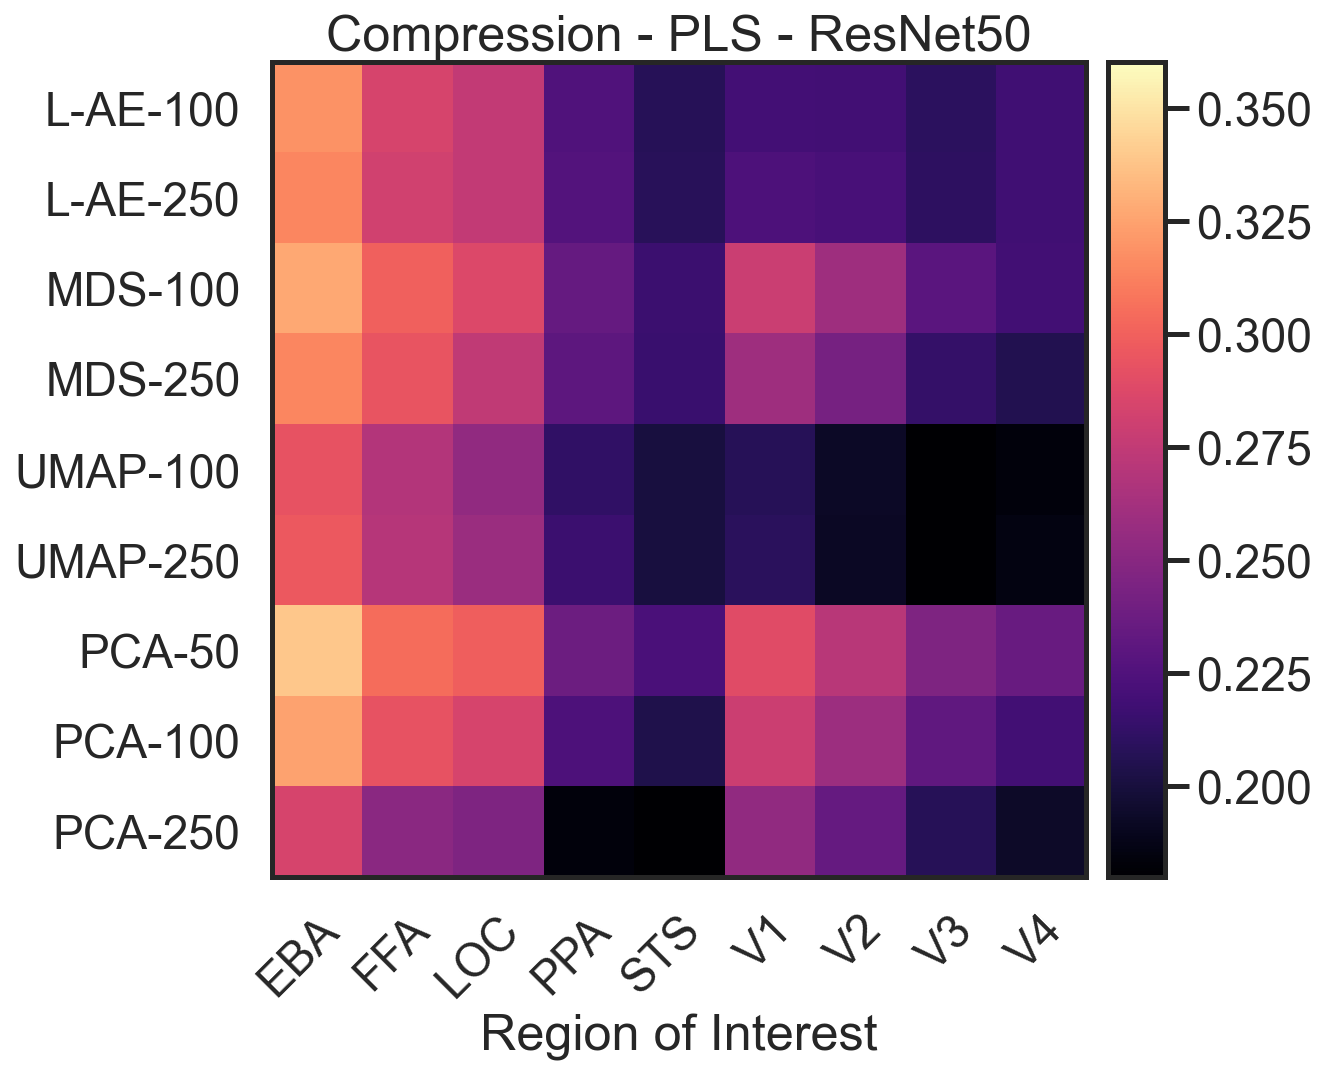

In [64]:
scores = [autoencoder_100, autoencoder_250,
          mds_100, mds_250,
          umap_100, umap_250,
          pca_50, pca_100, pca_250]
range_y = ['L-AE-100', "L-AE-250",
           "MDS-100", "MDS-250",
           "UMAP-100", "UMAP-250",
           "PCA-50", "PCA-100", "PCA-250"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Compression - PLS - ResNet50"
ylabel = None #"Compression Technique"
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# Architecture Comparison

In [31]:
meta_log_alex, hyper_log_alex = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_alexnet_bo_25")
meta_log_vgg, hyper_log_vgg = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_vgg_bo_25")
meta_log_r18, hyper_log_r18 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet18_bo_25")
meta_log_r34, hyper_log_r34 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet34_bo_25")
meta_log_r50, hyper_log_r50 = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_r101, hyper_log_r101 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet101_bo_25")
meta_log_r152, hyper_log_r152 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_eff, hyper_log_eff = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_efficientnet_b3_bo_25")
meta_log_rnext, hyper_log_rnext = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnext50_32x4d_bo_25")


alexnet = get_norm_score(hyper_log_alex)
vgg = get_norm_score(hyper_log_vgg)
r18 = get_norm_score(hyper_log_r18)
r34 = get_norm_score(hyper_log_r34)
r50 = get_norm_score(hyper_log_r50)
r101 = get_norm_score(hyper_log_r101)
r152 = get_norm_score(hyper_log_r152)
enet = get_norm_score(hyper_log_eff)
rnext = get_norm_score(hyper_log_rnext)

[0.30573749 0.29174114 0.2672166  0.22565845 0.21118222 0.27955577
 0.2538552  0.21985578 0.20909417]
[0.33175135 0.30422405 0.29096965 0.22894857 0.21705948 0.28504156
 0.25773851 0.22487886 0.22499617]
[0.33510145 0.30123672 0.29044812 0.22648133 0.21800347 0.29419984
 0.27655564 0.24472115 0.22956333]
[0.33918029 0.3065165  0.29758833 0.23263551 0.22278227 0.28970167
 0.27070855 0.24462405 0.23650492]
[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]
[0.34221185 0.31274836 0.30271019 0.23913943 0.22700942 0.2857113
 0.27054667 0.24924287 0.24223315]
[0.3446597  0.31498121 0.3055256  0.24434963 0.22549823 0.28378085
 0.26901083 0.24997533 0.24694798]
[0.33265759 0.30474351 0.29354968 0.2348559  0.22089037 0.29116248
 0.26981707 0.23470164 0.21819677]
[0.34137619 0.30874911 0.29507281 0.2423055  0.22753013 0.28522069
 0.26880395 0.24566582 0.2399894 ]


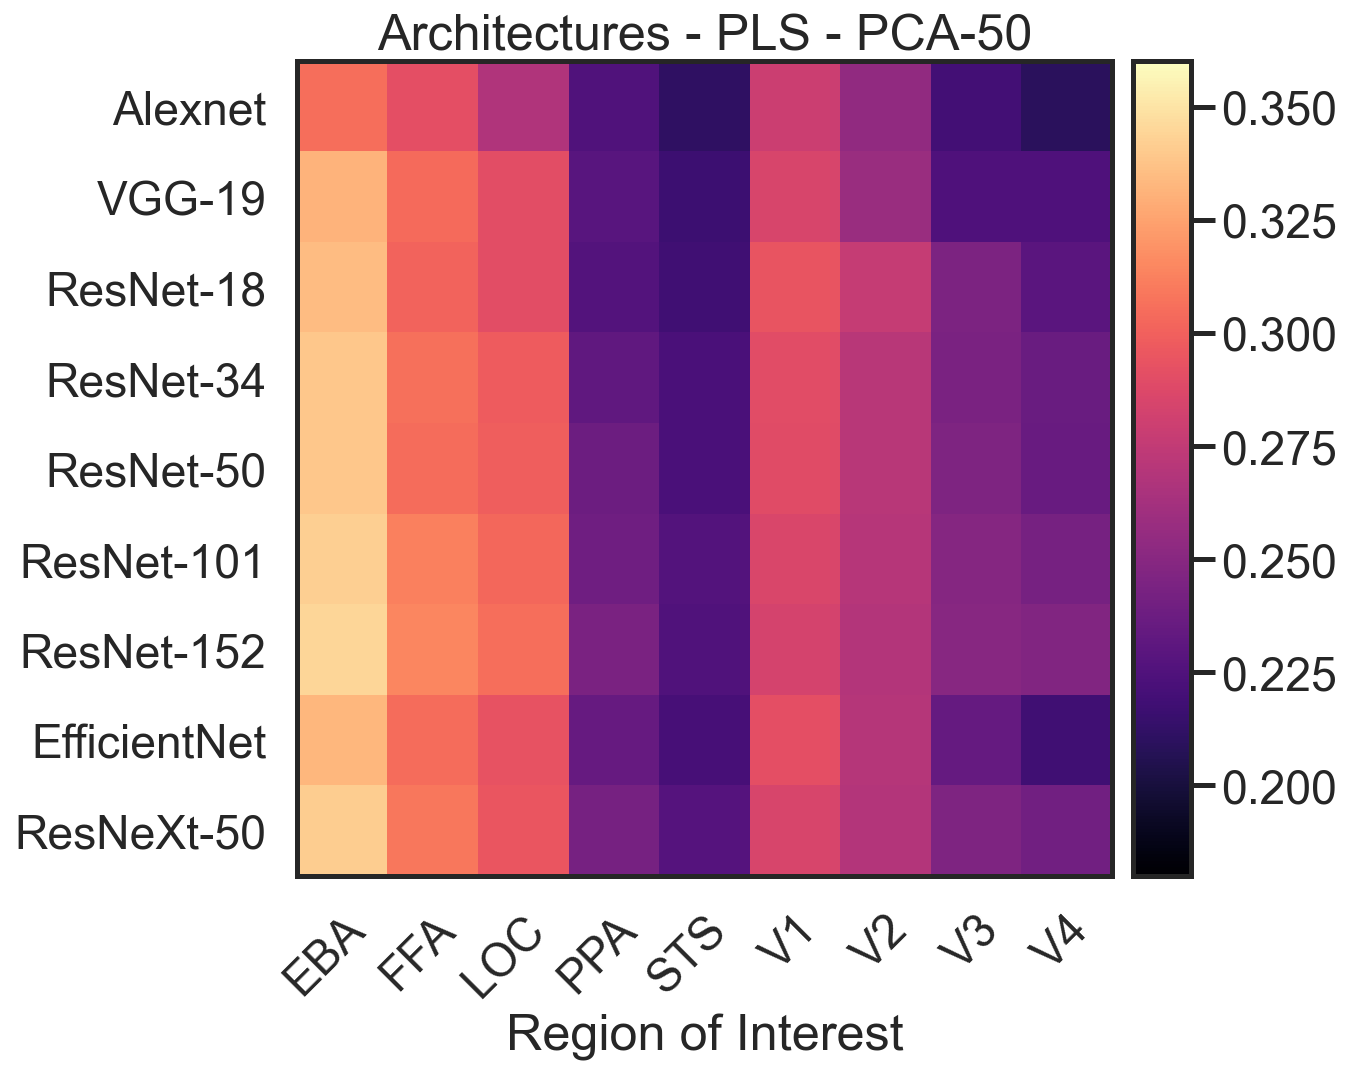

In [65]:
scores = [alexnet, vgg,
          r18, r34, r50, r101, r152,
          enet, rnext]
range_y = ['Alexnet', "VGG-19",
           "ResNet-18", "ResNet-34",
           "ResNet-50", "ResNet-101", "ResNet-152",
           "EfficientNet", "ResNeXt-50"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Architectures - PLS - PCA-50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# Encoding Model Comparison

In [39]:
meta_log_ols, hyper_log_ols = load_result_logs("../data/experiments/roi/encoders/ols_pca_50_resnet152_bo_25")
meta_log_elastic, hyper_log_elastic = load_result_logs("../data/experiments/roi/encoders/elastic_pca_50_resnet152_bo_25")
meta_log_mlp, hyper_log_mlp = load_result_logs("../data/experiments/roi/encoders/mlp_pca_50_resnet152_bo_25")
meta_log_pls, hyper_log_pls = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_cca, hyper_log_cca = load_result_logs("../data/experiments/roi/encoders/cca_pca_50_resnet152_bo_25")
meta_log_cpls, hyper_log_cpls = load_result_logs("../data/experiments/roi/encoders/cpls_pca_50_resnet152_bo_25")
meta_log_omp, hyper_log_omp = load_result_logs("../data/experiments/roi/encoders/omp_pca_50_resnet152_bo_25")


ols = get_norm_score(hyper_log_ols)
elastic = get_norm_score(hyper_log_elastic)
mlp = get_norm_score(hyper_log_mlp)
pls = get_norm_score(hyper_log_pls)
cca = get_norm_score(hyper_log_cca)
cpls = get_norm_score(hyper_log_cpls)
cpls = get_norm_score(hyper_log_cpls)
omp = get_norm_score(hyper_log_cpls)

[0.32717523 0.28829626 0.28828901 0.2162727  0.19941436 0.26399554
 0.25305353 0.23548636 0.23226273]
[0.33505485 0.30210972 0.29605512 0.23465772 0.21597064 0.27784764
 0.26382317 0.24510892 0.24335168]
[0.34888613 0.30961927 0.30369235 0.24263692 0.21893542 0.28452387
 0.27157359 0.25136083 0.24968421]
[0.3446597  0.31498121 0.3055256  0.24434963 0.22549823 0.28378085
 0.26901083 0.24997533 0.24694798]
[0.31674922 0.2982299  0.27540153 0.22689654 0.21982384 0.2652428
 0.24666575 0.23069032 0.23141317]
[0.29329086 0.28019564 0.25646416 0.21124931 0.19465373 0.2403133
 0.22668769 0.21027672 0.21504288]
[0.29329086 0.28019564 0.25646416 0.21124931 0.19465373 0.2403133
 0.22668769 0.21027672 0.21504288]
[0.29329086 0.28019564 0.25646416 0.21124931 0.19465373 0.2403133
 0.22668769 0.21027672 0.21504288]


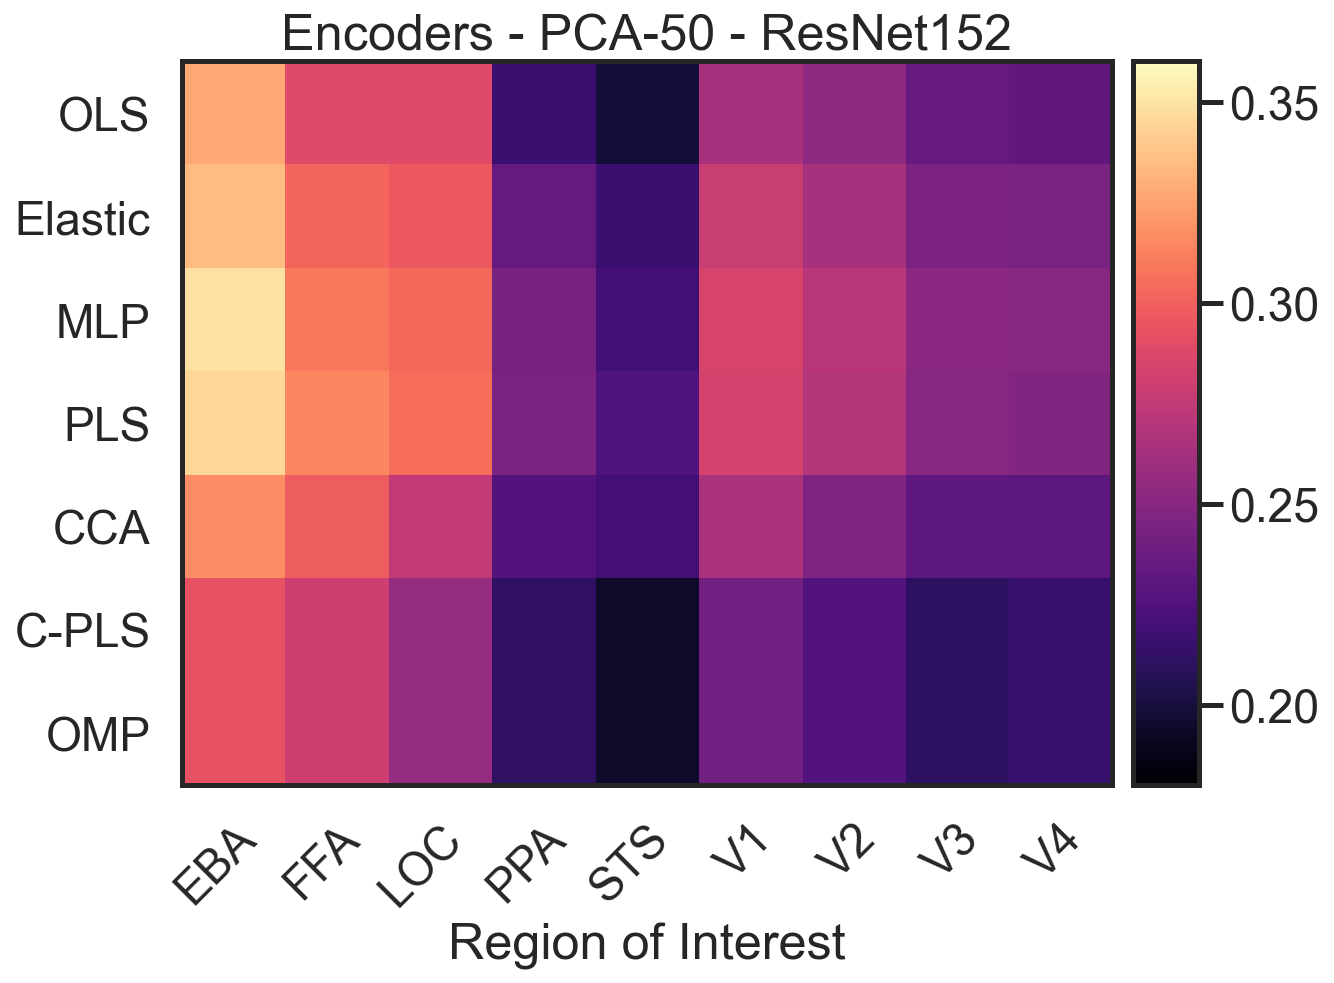

In [66]:
scores = [ols, elastic, mlp, pls, cca, cpls, omp]
range_y = ['OLS', "Elastic", "MLP", "PLS", "CCA", "C-PLS", "OMP"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Encoders - PCA-50 - ResNet152"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# BOLD Filtering of Network Activations

In [52]:
meta_log_r50_mean, hyper_log_r50_mean = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_r50_pca, hyper_log_r50_pca = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_1d_pca_bo_25")
meta_log_r50_bold_1, hyper_log_r50_bold_1 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_bold_1_bo_25")
meta_log_r50_bold_2, hyper_log_r50_bold_2 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_bold_2_bo_25")
meta_log_r50_bold_3, hyper_log_r50_bold_3 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_bold_3_bo_25")

meta_log_r152_mean, hyper_log_r152_mean = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_r152_pca, hyper_log_r152_pca = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_1d_pca_bo_25")
meta_log_r152_bold_1, hyper_log_r152_bold_1 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_bold_1_bo_25")
meta_log_r152_bold_2, hyper_log_r152_bold_2 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_bold_2_bo_25")
meta_log_r152_bold_3, hyper_log_r152_bold_3 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_bold_3_bo_25")


r50_mean = get_norm_score(hyper_log_r50_mean)
r50_pca = get_norm_score(hyper_log_r50_pca)
r50_bold_1 = get_norm_score(hyper_log_r50_bold_1)
r50_bold_2 = get_norm_score(hyper_log_r50_bold_2)
r50_bold_3 = get_norm_score(hyper_log_r50_bold_3)
print(20*"=")
r152_mean = get_norm_score(hyper_log_r152_mean)
r152_pca = get_norm_score(hyper_log_r152_pca)
r152_bold_1 = get_norm_score(hyper_log_r152_bold_1)
r152_bold_2 = get_norm_score(hyper_log_r152_bold_2)
r152_bold_3 = get_norm_score(hyper_log_r152_bold_3)


[0.33942554 0.30460213 0.29919037 0.23826842 0.22258705 0.2896858
 0.27076693 0.2454002  0.2359832 ]
[0.33357084 0.30244091 0.29402439 0.23558487 0.22112606 0.28581566
 0.26699036 0.24060971 0.23165593]
[0.33849516 0.30424021 0.29812589 0.23732137 0.22202189 0.28975705
 0.27266438 0.24683091 0.23438642]
[0.3373039  0.30253894 0.2978714  0.23796056 0.22232997 0.29071892
 0.27268784 0.24665875 0.23516672]
[0.33958788 0.30539937 0.29966645 0.23853066 0.22222859 0.28971594
 0.27164898 0.24470569 0.23588056]
[0.3446597  0.31498121 0.3055256  0.24434963 0.22549823 0.28378085
 0.26901083 0.24997533 0.24694798]
[0.34270448 0.31238314 0.30248456 0.24284499 0.22423779 0.28037905
 0.26467937 0.24656067 0.24426379]
[0.34756496 0.31491496 0.30726056 0.24455324 0.22515227 0.28277985
 0.26989981 0.25107183 0.2462825 ]
[0.346818   0.31552195 0.30646913 0.2447133  0.22548194 0.28311208
 0.26924695 0.2496595  0.24467533]
[0.34660413 0.31380391 0.30602916 0.24530866 0.22746283 0.28522481
 0.26948826 0.25

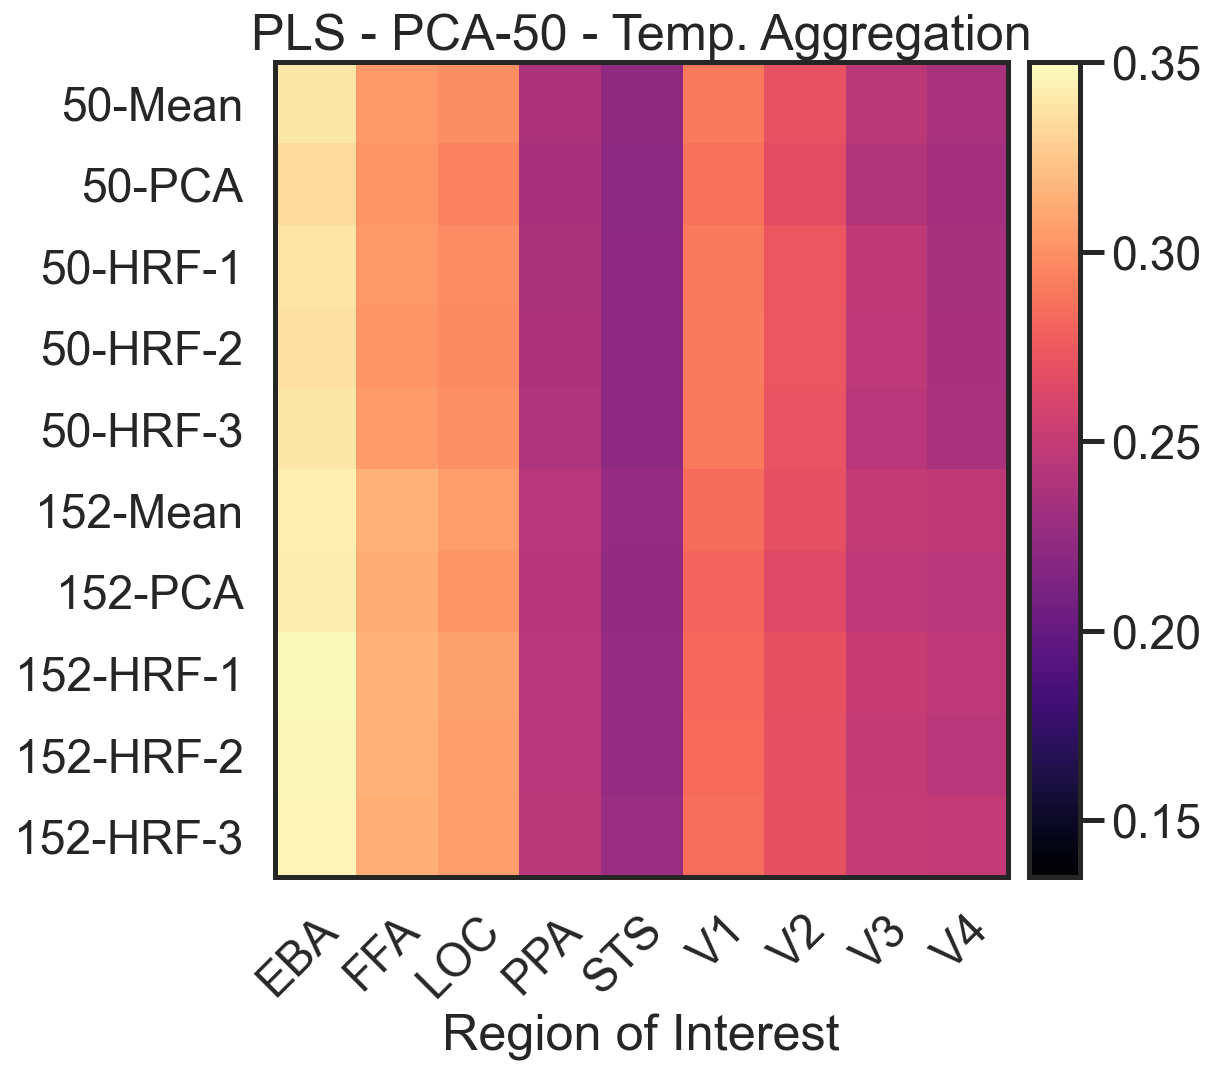

In [70]:
scores = [r50_mean, r50_pca, r50_bold_1, r50_bold_2, r50_bold_3,
          r152_mean, r152_pca, r152_bold_1, r152_bold_2, r152_bold_3]
range_y = ['50-Mean', "50-PCA", "50-HRF-1", "50-HRF-2", "50-HRF-3",
           '152-Mean', "152-PCA", "152-HRF-1", "152-HRF-2", "152-HRF-3"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - PCA-50 - Temp. Aggregation"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.135, max_heat=0.35)

# Vone Networks

In [57]:
meta_log_50_vone_r50, hyper_log_50_vone_r50 = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_resnet50_bo_25")
meta_log_50_vone_r50_at, hyper_log_50_vone_r50_at = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_resnet50_at_bo_25")
meta_log_50_vone_r50_ns, hyper_log_50_vone_r50_ns = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_resnet50_ns_bo_25")
meta_log_50_vone_cornets, hyper_log_50_vone_cornets = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_cornets_bo_25")


meta_log_100_vone_r50, hyper_log_100_vone_r50 = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_resnet50_bo_25")
meta_log_100_vone_r50_at, hyper_log_100_vone_r50_at = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_resnet50_at_bo_25")
meta_log_100_vone_r50_ns, hyper_log_100_vone_r50_ns = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_resnet50_ns_bo_25")
meta_log_100_vone_cornets, hyper_log_100_vone_cornets = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_cornets_bo_25")


pca_50_vone_r50 = get_norm_score(hyper_log_50_vone_r50)
pca_50_vone_r50_at = get_norm_score(hyper_log_50_vone_r50_at)
pca_50_vone_r50_ns = get_norm_score(hyper_log_50_vone_r50_ns)
pca_50_vone_cornets = get_norm_score(hyper_log_50_vone_cornets)

print(20*"=")
pca_100_vone_r50 = get_norm_score(hyper_log_100_vone_r50)
pca_100_vone_r50_at = get_norm_score(hyper_log_100_vone_r50_at)
pca_100_vone_r50_ns = get_norm_score(hyper_log_100_vone_r50_ns)
pca_100_vone_cornets = get_norm_score(hyper_log_100_vone_cornets)


[0.29224419 0.27416805 0.25560583 0.21986482 0.19648353 0.29957248
 0.27689595 0.24629024 0.22947919]
[0.27760101 0.26803932 0.24694329 0.21837907 0.19127362 0.29808969
 0.27694183 0.24396928 0.22875238]
[0.29659634 0.28722504 0.26330803 0.22560977 0.20566659 0.29324211
 0.27125469 0.24565612 0.23455491]
[0.33130378 0.30189334 0.28991557 0.23197199 0.21705378 0.30677665
 0.28488165 0.2528363  0.23708361]
[0.28166283 0.2650523  0.24560318 0.2090295  0.18051666 0.28932644
 0.26518319 0.23222855 0.21315572]
[0.28222386 0.26363712 0.24775159 0.19948827 0.18334695 0.28852285
 0.2641125  0.23204567 0.21187185]
[0.28675499 0.27388236 0.25422064 0.20664579 0.18838784 0.2809919
 0.25950435 0.23173664 0.21761479]
[0.31315807 0.28614036 0.27373023 0.215128   0.19843404 0.28867249
 0.26818617 0.23626573 0.21656408]


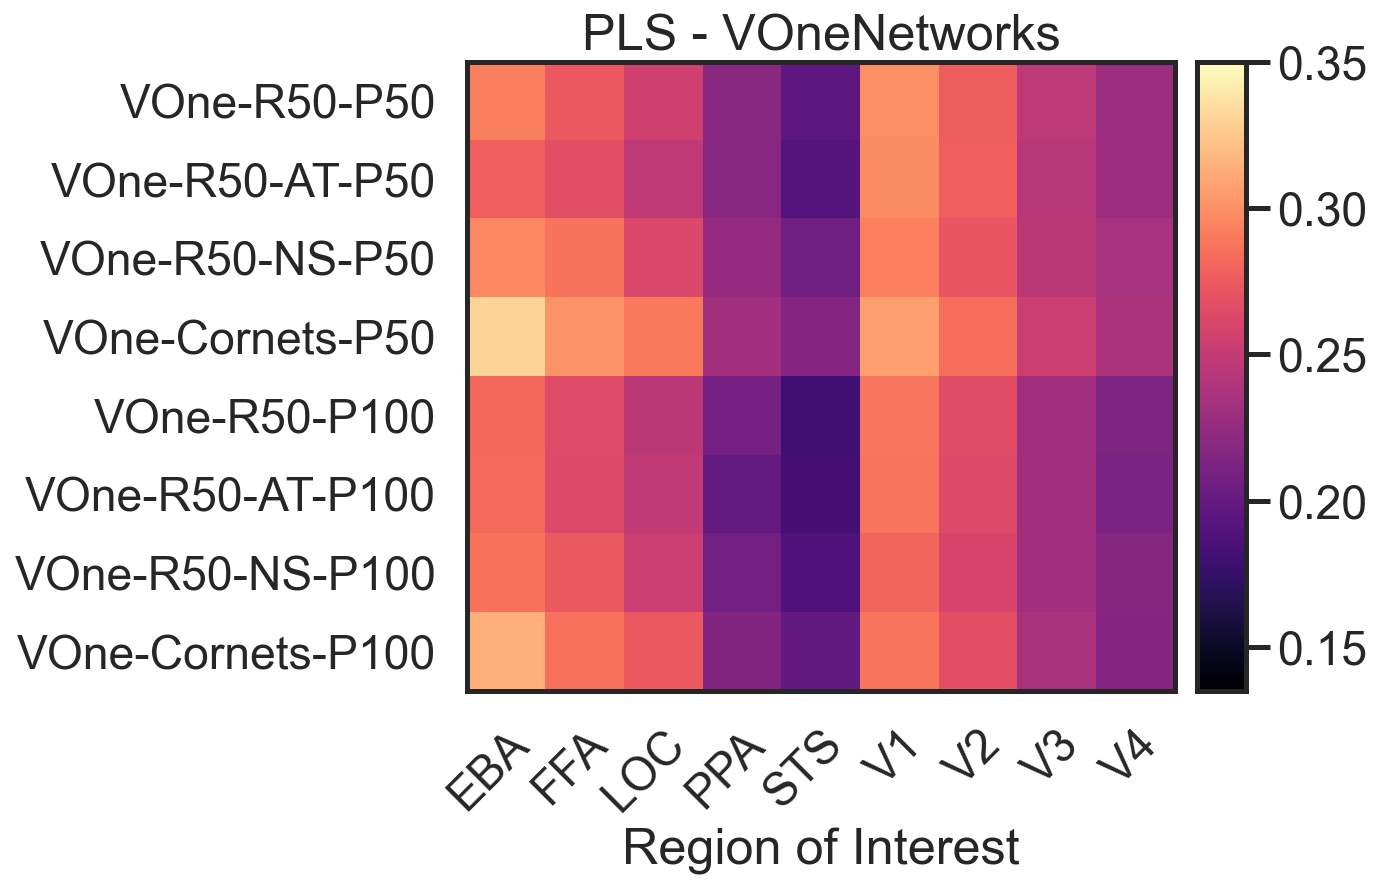

In [71]:
scores = [pca_50_vone_r50, pca_50_vone_r50_at, pca_50_vone_r50_ns, pca_50_vone_cornets,
          pca_100_vone_r50, pca_100_vone_r50_at, pca_100_vone_r50_ns, pca_100_vone_cornets]
range_y = ['VOne-R50-P50', "VOne-R50-AT-P50", "VOne-R50-NS-P50", "VOne-Cornets-P50",
           'VOne-R50-P100', "VOne-R50-AT-P100", "VOne-R50-NS-P100", "VOne-Cornets-P100",][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - VOneNetworks"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.135, max_heat=0.35)

# SimCLR-v2 Networks

In [60]:
meta_log_50_r50_1, hyper_log_50_r50_1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r50_1_bo_25")
meta_log_50_r50_2, hyper_log_50_r50_2 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r50_2_bo_25")

meta_log_100_r50_1, hyper_log_100_r50_1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_100_simclr_r50_1_bo_25")
meta_log_100_r50_2, hyper_log_100_r50_2 = load_result_logs("../data/experiments/roi/simclr/pls_pca_100_simclr_r50_2_bo_25")

meta_log_250_r50_1, hyper_log_250_r50_1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_250_simclr_r50_1_bo_25")
meta_log_250_r50_2, hyper_log_250_r50_2 = load_result_logs("../data/experiments/roi/simclr/pls_pca_250_simclr_r50_2_bo_25")


pca_50_simclr_r50_1 = get_norm_score(hyper_log_50_r50_1)
pca_50_simclr_r50_2 = get_norm_score(hyper_log_50_r50_2)

pca_100_simclr_r50_1 = get_norm_score(hyper_log_100_r50_1)
pca_100_simclr_r50_2 = get_norm_score(hyper_log_100_r50_2)

pca_250_simclr_r50_1 = get_norm_score(hyper_log_250_r50_1)
pca_250_simclr_r50_2 = get_norm_score(hyper_log_250_r50_2)

[0.35466443 0.32283589 0.31520995 0.25171697 0.22921323 0.30240607
 0.28008256 0.24637918 0.24420126]
[0.35891701 0.33119318 0.31977665 0.2555049  0.23655282 0.29301315
 0.27394062 0.24985369 0.24747547]
[0.34594098 0.30864512 0.30506184 0.24154051 0.21617853 0.29128812
 0.26540401 0.23453863 0.23439966]
[0.34796735 0.32030113 0.30730991 0.23996797 0.22318774 0.28166734
 0.26355666 0.23812679 0.23366838]
[0.30460353 0.269423   0.26170999 0.20651308 0.18457186 0.25733145
 0.23664648 0.20977482 0.1964793 ]
[0.32217263 0.28169521 0.27259344 0.20430925 0.19215027 0.25666382
 0.24083258 0.21590334 0.20353246]


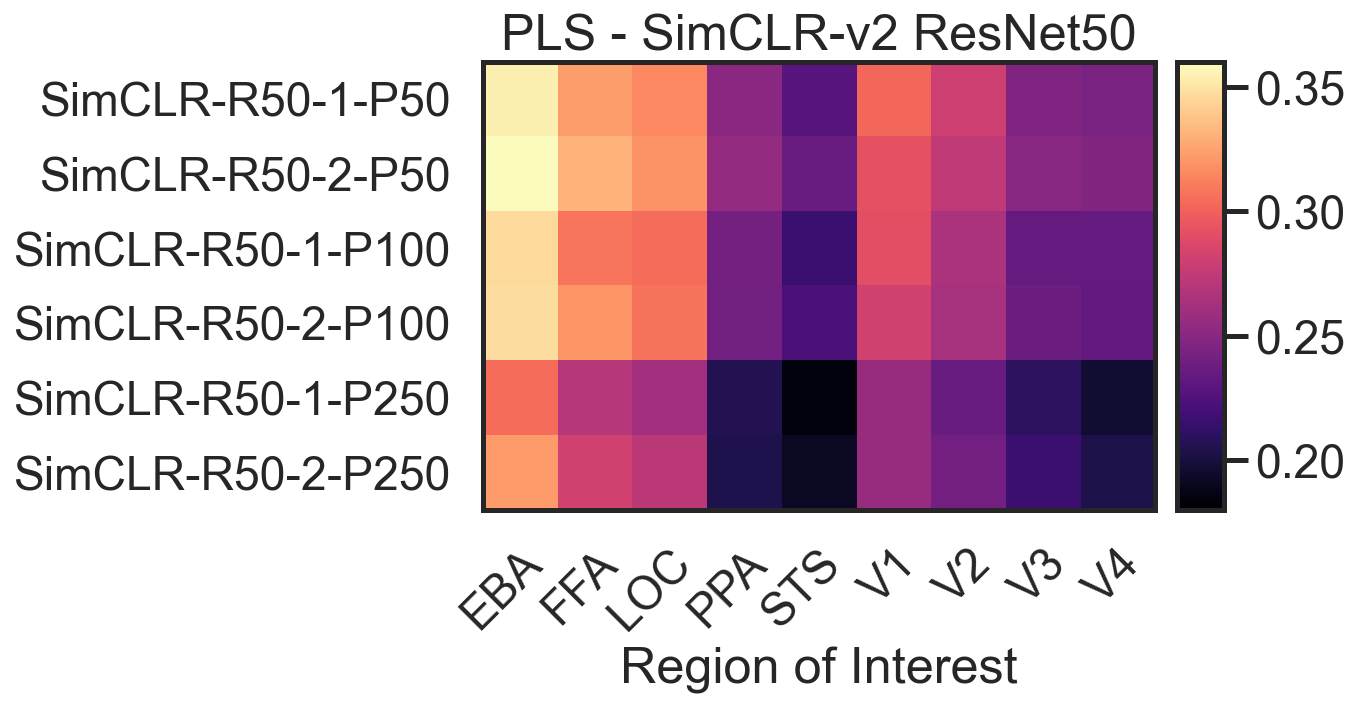

In [72]:
scores = [pca_50_simclr_r50_1, pca_50_simclr_r50_2, pca_100_simclr_r50_1, pca_100_simclr_r50_2,
          pca_250_simclr_r50_1, pca_250_simclr_r50_2]
range_y = ['SimCLR-R50-1-P50', "SimCLR-R50-2-P50", "SimCLR-R50-1-P100", "SimCLR-R50-2-P100",
           "SimCLR-R50-1-P250", "SimCLR-R50-2-P250"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - SimCLR-v2 ResNet50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# Best Layer Per ROI/Subject

In [ ]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")

# ImageNet Validation Scores

(0.55, 0.81)

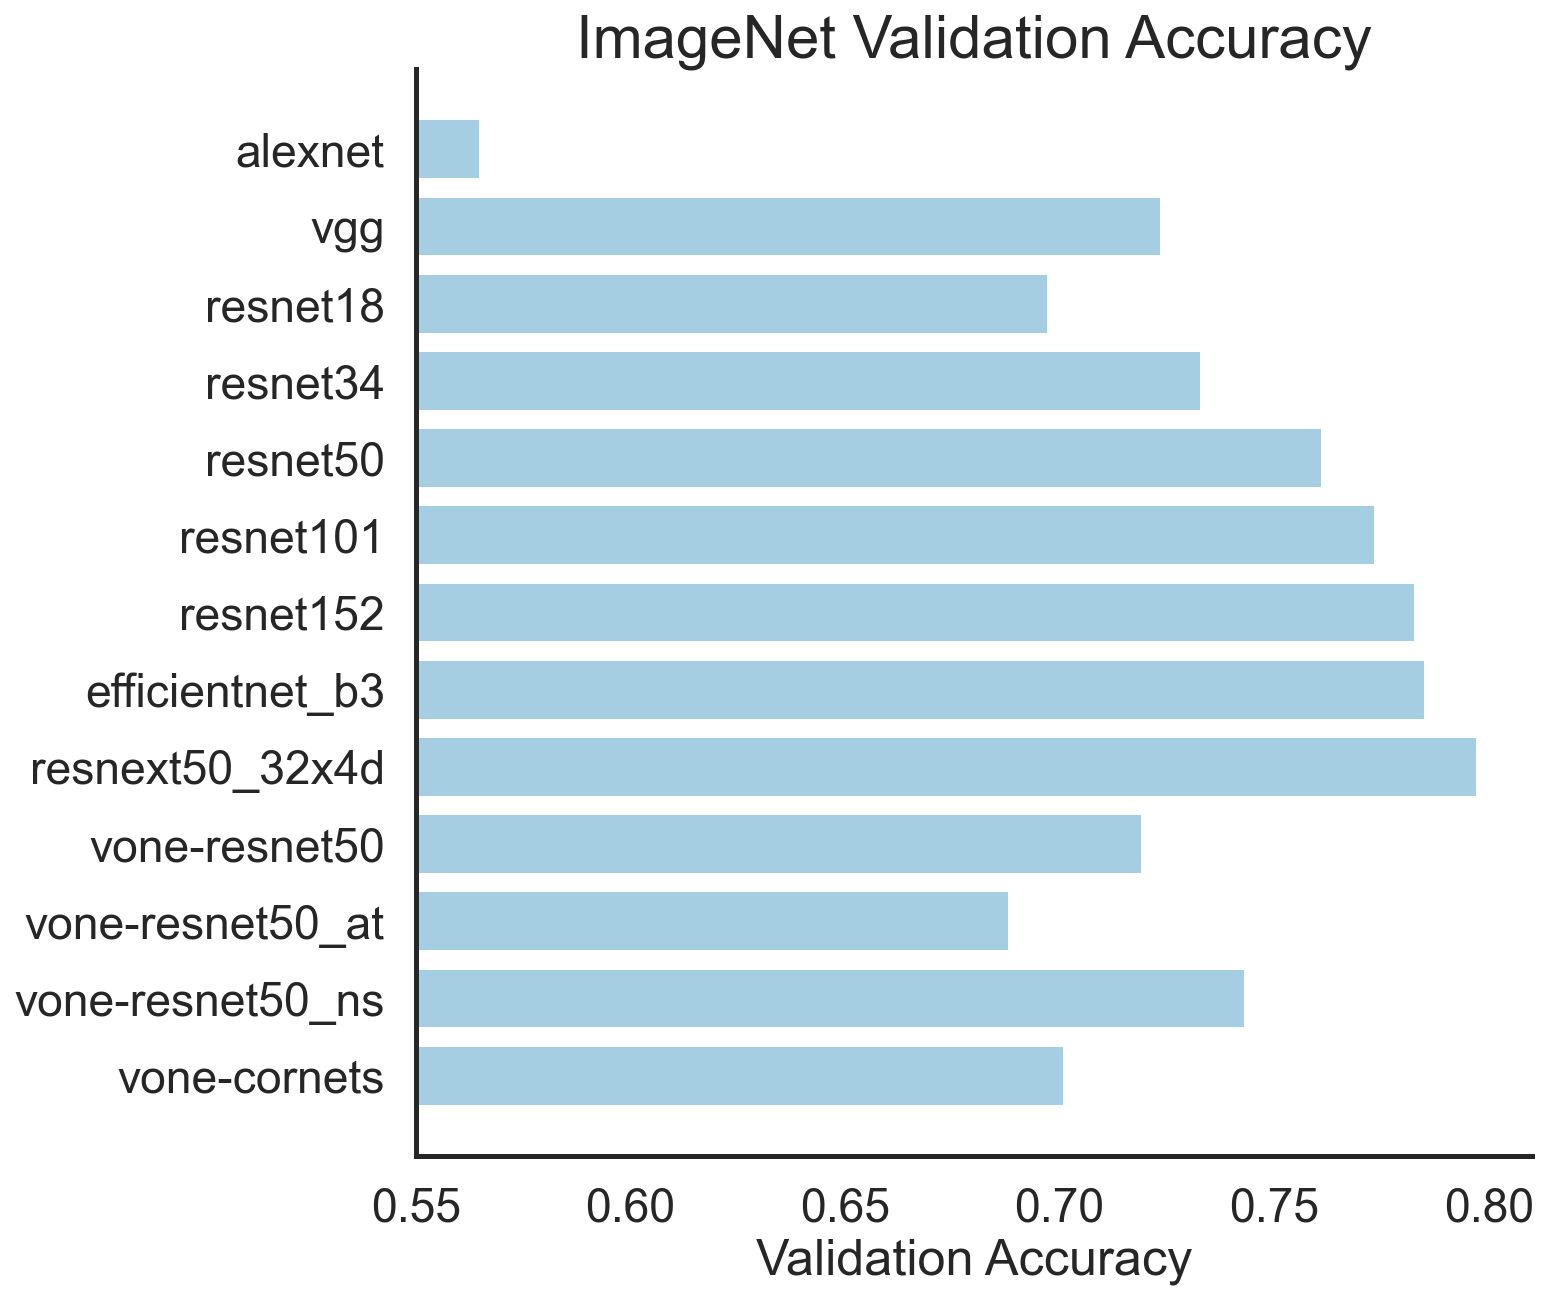

In [81]:
import pandas as pd

df = pd.read_csv("../data/imagenet_val_scores.csv", index_col=0)
x_labels = df['model_type'].tolist()[::-1]

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(np.arange(df.shape[0]), df["top1"][::-1])
ax.set_yticks(np.arange(df.shape[0]))
ax.set_yticklabels(x_labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Validation Accuracy")
ax.set_title("ImageNet Validation Accuracy", fontsize=30)
ax.set_xlim(0.55, 0.81)

In [74]:
df

,loss,top1,top5,dur,model_type
0,1.910298,0.56518,0.79070,0.094356,alexnet
1,1.115526,0.72376,0.90876,0.267834,vgg
2,1.247314,0.69758,0.89076,0.094106,resnet18
3,1.081325,0.73314,0.91420,0.092934,resnet34
4,0.961835,0.76130,0.92862,0.149563,resnet50
5,0.911946,0.77374,0.93546,0.236533,resnet101
6,0.876509,0.78312,0.94046,0.328968,resnet152
7,0.920299,0.78544,0.94366,0.137150,efficientnet_b3
8,0.890792,0.79746,0.94660,0.189084,resnext50_32x4d
9,1.128154,0.71950,0.90470,0.343361,vone-resnet50
